In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('../data/macrodata.csv',index_col=0,parse_dates=True)

In [3]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


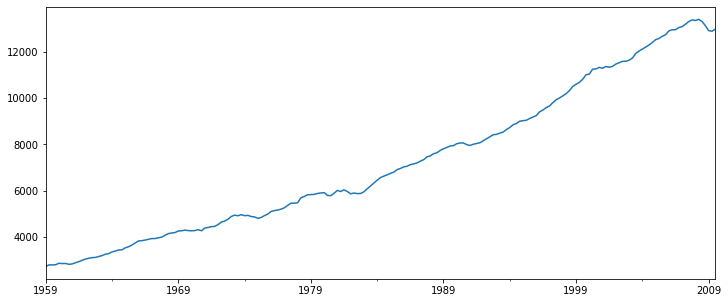

In [5]:
df['realgdp'].plot(figsize=(12,5))

In [7]:

from statsmodels.tsa.filters.hp_filter import hpfilter

In [8]:
gdp_cycle, gdp_trend = hpfilter(df['realgdp'],lamb=1600)
type(gdp_trend)


pandas.core.series.Series

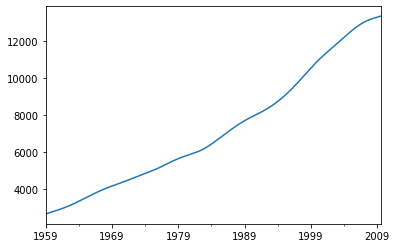

In [11]:
gdp_trend.plot()
df['trend']  = gdp_trend

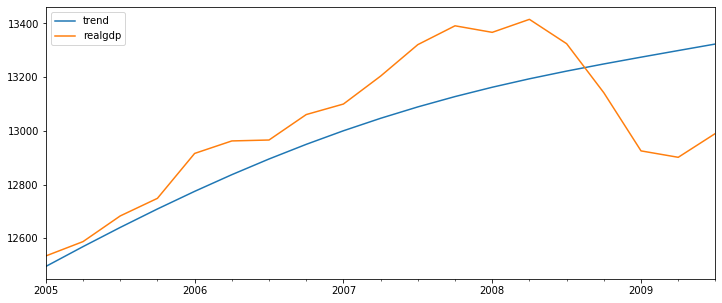

In [13]:
df[['trend','realgdp']]['2005-01-01':].plot(figsize=(12,5))

In [15]:
# -- ETS Decomposition -- #
## Trend, seasonality and residual
airline = pd.read_csv('../data/airline_passengers.csv',index_col='Month',parse_dates=True)

In [16]:
airline.dropna(inplace=True)

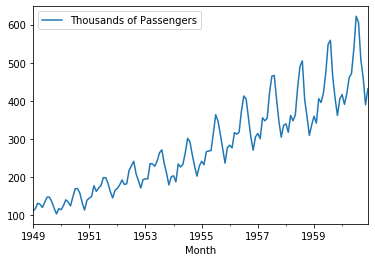

In [17]:
airline.plot()

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [23]:
result = seasonal_decompose(airline['Thousands of Passengers'],model='multiplicative')

In [24]:
result.trend

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

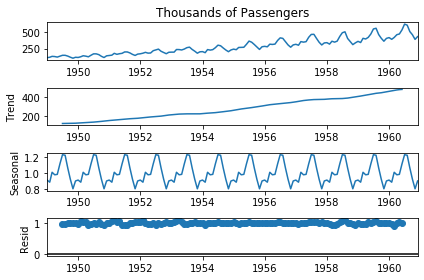

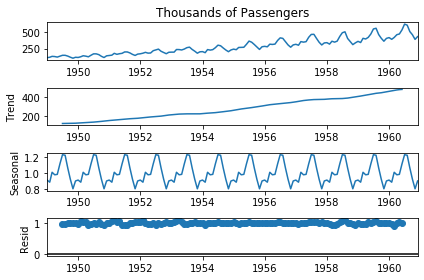

In [25]:
result.plot()

In [29]:
from pylab import rcParams
rcParams['figure.figsize']=(12,7)

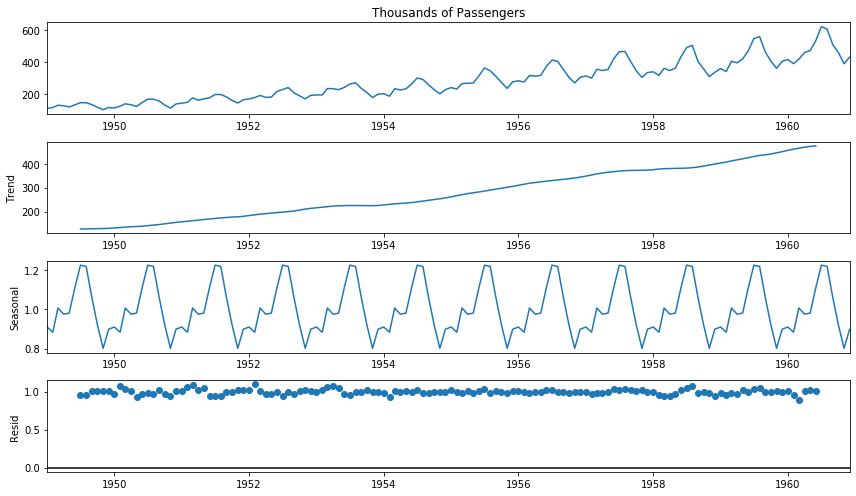

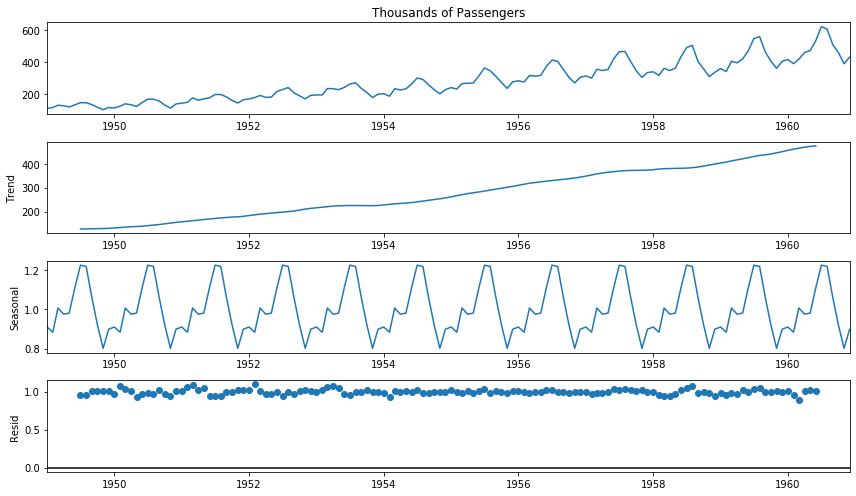

In [30]:
result.plot()